# Mood Analysis
Analyzing my mood based on data collected with Bearable over the period from Feb 2021 to June 2023.

In [1]:
# Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('bearable-export-25-06-2023.csv')

## Exploration (skip this)

### Rename Rating

In [4]:
# Rename rating/amount column to rating
df.rename(columns={'rating/amount': 'rating'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            12510 non-null  object
 1   date formatted  12510 non-null  object
 2   weekday         12510 non-null  object
 3   time of day     11708 non-null  object
 4   category        12510 non-null  object
 5   rating          9062 non-null   object
 6   detail          12350 non-null  object
 7   notes           430 non-null    object
dtypes: object(8)
memory usage: 782.0+ KB


In [5]:
# Show distinct values for rating
df['rating'].unique()

array(['7', '8', '5', '6', nan, '7:30', '4', '3', '2', '1', '1.75L',
       '7:00', '2L', '1.5L', '8:00', '1L', '1.25L', '9', '6:30', '0.75L',
       '0.5L', '0.25L', '6:00', '10', 'BSC Type 5', '2.25L', 'BSC Type 6',
       '9:00', 'BSC Type 3', 'BSC Type 4', '4:30', '5:30', '10:30',
       '4:00'], dtype=object)

### Change rating values to numeric

In [6]:
# Select rows where category is 'Mood'
df_mood = df[df['category'] == 'Mood']

# Print length of df and df_mood
print(f'Length of general dataset: {len(df)}\n'
      f'Length of mood dataset: {len(df_mood)}')

# Show distinct values for rating
df_mood['rating'].unique()

# Change rating values to numeric
df_mood['rating'] = pd.to_numeric(df_mood['rating'], errors='coerce')
df_mood.info()

Length of general dataset: 12510
Length of mood dataset: 2305
<class 'pandas.core.frame.DataFrame'>
Index: 2305 entries, 0 to 12509
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            2305 non-null   object
 1   date formatted  2305 non-null   object
 2   weekday         2305 non-null   object
 3   time of day     2305 non-null   object
 4   category        2305 non-null   object
 5   rating          2305 non-null   int64 
 6   detail          2301 non-null   object
 7   notes           12 non-null     object
dtypes: int64(1), object(7)
memory usage: 162.1+ KB


C:\Users\tobia\AppData\Local\Temp\ipykernel_18056\729418050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mood['rating'] = pd.to_numeric(df_mood['rating'], errors='coerce')


### Rough dropping of NA and plotting
Dropping rows with NA rating and only looking at available ratings on available dates

In [7]:
df_mood.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2305 entries, 0 to 12509
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            2305 non-null   object
 1   date formatted  2305 non-null   object
 2   weekday         2305 non-null   object
 3   time of day     2305 non-null   object
 4   category        2305 non-null   object
 5   rating          2305 non-null   int64 
 6   detail          2301 non-null   object
 7   notes           12 non-null     object
dtypes: int64(1), object(7)
memory usage: 162.1+ KB


In [8]:
# Drop null values in column rating
df_mood.dropna(subset=['rating'], inplace=True)	

C:\Users\tobia\AppData\Local\Temp\ipykernel_18056\3649859315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mood.dropna(subset=['rating'], inplace=True)


In [9]:
# Update index to match length of df_mood
df_mood.index = range(len(df_mood))	

In [10]:
# Reduce the entries in df_mood by aggregarting the rows by week using the 'date formatted' column and the mean of the 'rating' column
# Extract month from date formatted column
df_mood['date formatted'] = pd.to_datetime(df_mood['date formatted'])	
df_mood['month'] = df_mood['date formatted'].dt.month
df_mood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2305 non-null   object        
 1   date formatted  2305 non-null   datetime64[ns]
 2   weekday         2305 non-null   object        
 3   time of day     2305 non-null   object        
 4   category        2305 non-null   object        
 5   rating          2305 non-null   int64         
 6   detail          2301 non-null   object        
 7   notes           12 non-null     object        
 8   month           2305 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(6)
memory usage: 153.2+ KB


C:\Users\tobia\AppData\Local\Temp\ipykernel_18056\4000881100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mood['date formatted'] = pd.to_datetime(df_mood['date formatted'])
C:\Users\tobia\AppData\Local\Temp\ipykernel_18056\4000881100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mood['month'] = df_mood['date formatted'].dt.month


TypeError: unhashable type: 'numpy.ndarray'

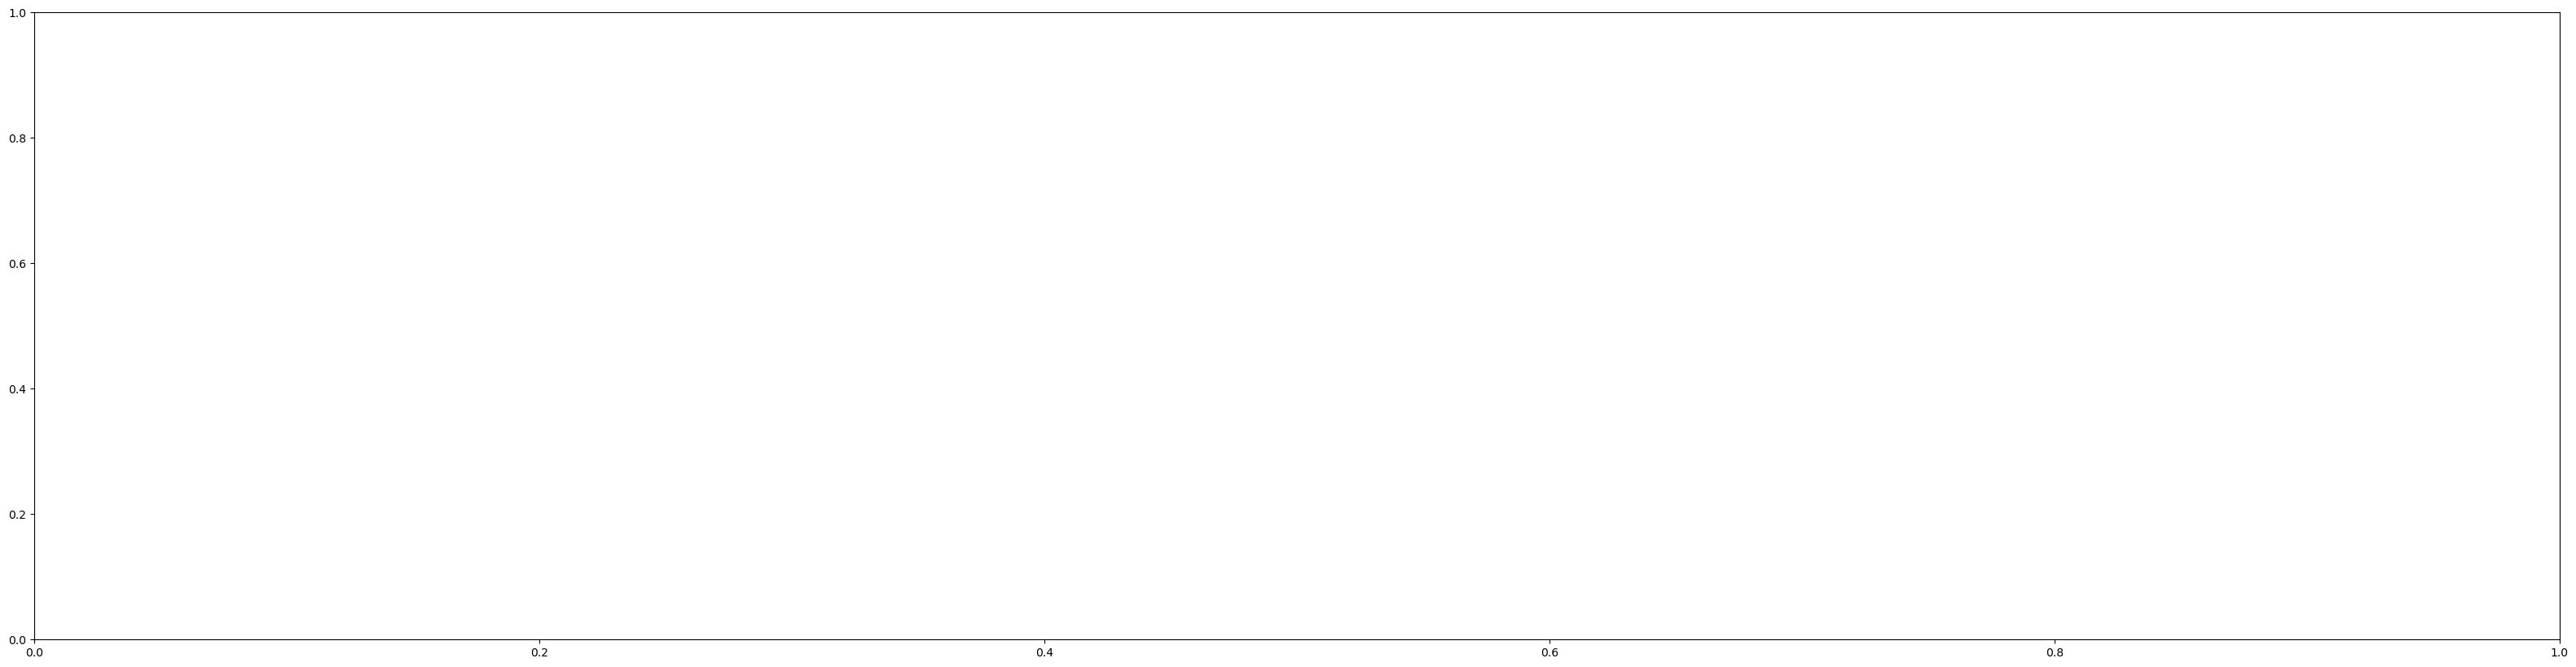

In [11]:
# Plot df_mood and highlight points > 7 as green and points < 4 as red
plt.figure(figsize=(40, 10))
plt.plot(df_mood, color='blue')
plt.axhline(y=7, color='green', linestyle='--')
plt.axhline(y=4, color='red', linestyle='--')

# x-axis labels every 30 days, rotate them by 90° and increase their font size
plt.xticks(range(0, len(df_mood), 30), 
           df_mood.index[::30], 
           rotation=90,
           fontsize=25)
# Increase font size of y-axis labels
plt.yticks(fontsize=25)	

# Make the plot overflow scrollable
plt.tight_layout()	
plt.show()	

## Data Engineering

In [3]:
df.head()

,date,date formatted,weekday,time of day,category,rating/amount,detail,notes
0,22nd Feb 2021,2021-02-22,Monday,07:43,Mood,7,Loved | Good | Relaxed,NaN
1,22nd Feb 2021,2021-02-22,Monday,12:31,Mood,8,Happy | Optimistic,NaN
2,22nd Feb 2021,2021-02-22,Monday,13:53,Mood,5,Stressed | Anxious,NaN
3,22nd Feb 2021,2021-02-22,Monday,15:22,Mood,5,Stressed | Anxious | Frustrated | Overwhelmed,NaN
4,22nd Feb 2021,2021-02-22,Monday,17:41,Mood,6,Meh | Anxious | Exhausted,NaN


The main goal of this section is to extract the factors encoded as strings seperated by | from the **detail** column. It is important to note, that for this we must consider all categories in tandem, since each category contains the respective factors in its detail field.

Furthermore, we need to ensure that all columns have a usable datatype (ie. date for one of the date columns, numeric for rating/amount).

In addition to that we are going to bring in some external data, such as the semester times and the days on which I worked for my working student job.

### Motivation for new df structure
How many different categories are there?

In [4]:
df['category'].value_counts()

category
Symptom              3827
Mood                 2305
Meds/Supplements     1349
Nutrition factors    1273
Factors              1090
Energy                916
Gratitudes            478
Sleep                 418
Sleep factors         376
Sleep quality         350
Nutrition              62
Water                  34
Bowel Movements        32
Name: count, dtype: int64

In [6]:
df[df['category'] == 'Factors']

,date,date formatted,weekday,time of day,category,rating,detail,notes
7,22nd Feb 2021,2021-02-22,Monday,all day,Factors,NaN,Sophia's place | Brush teeth | Sunny | Cold | ...,NaN
39,23rd Feb 2021,2021-02-23,Tuesday,pre,Factors,NaN,Walk | Wash dishes | Moderate screen time | In...,NaN
40,23rd Feb 2021,2021-02-23,Tuesday,am,Factors,NaN,Studying | Busy day | High screen time | Very ...,NaN
41,23rd Feb 2021,2021-02-23,Tuesday,mid,Factors,NaN,Moderate screen time | In nature | Meditation ...,NaN
42,23rd Feb 2021,2021-02-23,Tuesday,pm,Factors,NaN,Busy day | High screen time | Brush teeth | Fl...,NaN
...,...,...,...,...,...,...,...,...
12377,18th May 2023,2023-05-18,Thursday,all day,Factors,NaN,Quiet day | Moderate screen time | Public tran...,NaN
12381,19th May 2023,2023-05-19,Friday,all day,Factors,NaN,I2DL | ReqEng | OR | High screen time | Studyi...,NaN
12394,20th May 2023,2023-05-20,Saturday,all day,Factors,NaN,Quiet day | Moderate screen time | In nature |...,NaN
12406,21st May 2023,2023-05-21,Sunday,all day,Factors,NaN,Busy day | High screen time | Office | Home | ...,NaN


In [ ]:
df[df['category'] == 'Mood']

,date,date formatted,weekday,time of day,category,rating,detail,notes
0,22nd Feb 2021,2021-02-22,Monday,07:43,Mood,7,Loved | Good | Relaxed,NaN
1,22nd Feb 2021,2021-02-22,Monday,12:31,Mood,8,Happy | Optimistic,NaN
2,22nd Feb 2021,2021-02-22,Monday,13:53,Mood,5,Stressed | Anxious,NaN
3,22nd Feb 2021,2021-02-22,Monday,15:22,Mood,5,Stressed | Anxious | Frustrated | Overwhelmed,NaN
4,22nd Feb 2021,2021-02-22,Monday,17:41,Mood,6,Meh | Anxious | Exhausted,NaN
...,...,...,...,...,...,...,...,...
12505,23rd Jun 2023,2023-06-23,Friday,08:03,Mood,7,Meh | Loved | Grateful | Good | Optimistic | C...,NaN
12506,24th Jun 2023,2023-06-24,Saturday,09:16,Mood,7,Loved | Grateful | Good | Nervous | Optimistic...,NaN
12507,24th Jun 2023,2023-06-24,Saturday,12:03,Mood,7,Meh | Loved | Grateful | Frustrated | Annoyed ...,NaN
12508,24th Jun 2023,2023-06-24,Saturday,18:13,Mood,6,Exhausted | Anxious | Meh | Loved | Good | Gra...,NaN


### Create new df
Currently there are multiple entries per day differentiated by categories and within each category there can be multiple entries based on time of day (actual wall clock time) or buckets (see above). To facilitate a proper analysis we will transform this df structure into one where each category's content is represented by its own column that is 1-Hot Encoded. 

We will do both in one step via inserting correctly into the new df.

#### Update date formatted datatype and rename to date

In [3]:
df.drop('date', axis=1, inplace=True)
df.rename(columns={'date formatted': 'date'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           12510 non-null  object
 1   weekday        12510 non-null  object
 2   time of day    11708 non-null  object
 3   category       12510 non-null  object
 4   rating/amount  9062 non-null   object
 5   detail         12350 non-null  object
 6   notes          430 non-null    object
dtypes: object(7)
memory usage: 684.3+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])

#### Transform data to new df structure

In [5]:
df.drop('time of day', axis=1, inplace=True)

In [25]:
def join_details(details: pd.Series) -> str:
        # Remove NaN values
        details = details.dropna()

        # Join details with ' | ' separator if there are more than 1
        return ' | '.join(details) if len(details) > 1 else details

def join_ratings(ratings: pd.Series) -> float:
        try:
                # Compute the median of the ratings that are available as pd.Series
                # Because of this we can directly call the median() function

                # Check that each value in the pd.Series is a float explicitly
                # If it is not, we simply return NaN
                ratings = pd.Series([float(rating) for rating in ratings])
                return ratings.median()
        except ValueError:
                return float('NaN')

# Collapse rows via group by aggregation of the date_formatted column using a custom mapping for the remaining fields
# Note: The parameters passed into the aggregation functions are pd.Series
df_grouped = df.groupby(['date', 'category'], sort=False) \
                .agg(weekday=pd.NamedAgg(column='weekday', aggfunc='first'),
                        rating_amount=pd.NamedAgg(column='rating/amount', 
                                aggfunc=lambda ratings: join_ratings(ratings)),
                        detail=pd.NamedAgg(column='detail', aggfunc=lambda details: join_details(details)))
df_grouped.head()

weekday  rating_amount  \
date       category                               
2021-02-22 Mood           Monday            7.0   
           Factors        Monday            NaN   
           Sleep          Monday            NaN   
           Sleep quality  Monday            4.0   
           Sleep factors  Monday            NaN   

                                                                     detail  
date       category                                                          
2021-02-22 Mood           Loved | Good | Relaxed | Happy | Optimistic | ...  
           Factors        Sophia's place | Brush teeth | Sunny | Cold | ...  
           Sleep                                       In bed 22:30 - 06:45  
           Sleep quality                                               Good  
           Sleep factors                                     Woke refreshed

Now that the data are grouped by date and category the next step is to generate a 1-Hot encoding. For this we generate a column for each newly encountered detail string in the categories:

- Mood
- Factors
- Energy
- Nutrition factors
- Sleep quality
- Sleep factors

In [35]:
df_grouped.head(20)

weekday  rating_amount  \
date       category                                    
2021-02-22 Mood                Monday            7.0   
           Factors             Monday            NaN   
           Sleep               Monday            NaN   
           Sleep quality       Monday            4.0   
           Sleep factors       Monday            NaN   
           Energy              Monday            3.0   
           Meds/Supplements    Monday            1.0   
           Nutrition           Monday            NaN   
           Nutrition factors   Monday            NaN   
           Water               Monday            NaN   
           Gratitudes          Monday            NaN   
2021-02-23 Mood               Tuesday            6.5   
           Factors            Tuesday            NaN   
           Sleep              Tuesday            NaN   
           Sleep quality      Tuesday            3.0   
           Sleep factors      Tuesday            NaN   
           Energy             Tuesday            3.0   
           Meds/Supplements   Tuesday            1.0   
           Nutrition          Tuesday            NaN   
           Nutrition factors  Tuesday            NaN   

                                                                         detail  
date       category                                                              
2021-02-22 Mood               Loved | Good | Relaxed | Happy | Optimistic | ...  
           Factors            Sophia's place | Brush teeth | Sunny | Cold | ...  
           Sleep                                           In bed 22:30 - 06:45  
           Sleep quality                                                   Good  
           Sleep factors                                         Woke refreshed  
           Energy                      Good | Good | OK | Poor | OK | OK | Good  
           Meds/Supplements   Omega 3 (1000 mg) | Vitamin D (1000 units) | B...  
           Nutrition          Meals: Orange muesli | Meals: Tomato soup with...  
           Nutrition factors  Vegan | Healthy | Soy | Omega 3 | Vegan | Heal...  
           Water                                                             []  
           Gratitudes         taking care of myself. | A sunny day. | Sophia...  
2021-02-23 Mood               Anxious | Loved | Anxious | Stressed | Overwhe...  
           Factors            Walk | Wash dishes | Moderate screen time | In...  
           Sleep                                           In bed 21:40 - 06:30  
           Sleep quality                                                     OK  
           Sleep factors                                       Woke still tired  
           Energy                                  OK | OK | Good | Good | Poor  
           Meds/Supplements   Omega 3 (1000 mg) | Vitamin D (1000 units) | B...  
           Nutrition          Meals: Blueberry banana muesli. Snacks: Cookie...  
           Nutrition factors  Refined sugar | High sugar | Junk food | Healt...

In [63]:
# Create new pandas dataframe with index date and float columns mood and energy
df_grouped_mood_energy = pd.DataFrame(index=df_grouped.index.get_level_values('date').unique(), 
                                        columns=['mood', 'energy'])

# Fill the new dataframe with the values from the old dataframe and dynamically 
# generate 1-Hot encoded columns for the categories

# Works but apparently is memory inefficient

for index, row in df_grouped.iterrows():
        if row.name[1] == 'Mood':
                df_grouped_mood_energy.loc[row.name[0], 'mood'] = row['rating_amount']
        elif row.name[1] == 'Energy':
                df_grouped_mood_energy.loc[row.name[0], 'energy'] = row['rating_amount']
        elif row.name[1] == 'Sleep quality':
                df_grouped_mood_energy.loc[row.name[0], 'sleep quality'] = row['rating_amount']
        elif row.name[1] == 'Factors' or row.name[1] == 'Nutrition factors':
                # Split the details column into multiple columns using ' | ' as separator
                for detail in row['detail'].split(' | '):
                        # Skip if detail is empty
                        if detail == '':
                                continue
                        # Dynamically generate 1-Hot encoded columns for the categories
                        df_grouped_mood_energy.loc[row.name[0], detail] = 1

# De-fragment df_grouped_mood_energy
df_one_hot = df_grouped_mood_energy.sort_index()

C:\Users\tobia\AppData\Local\Temp\ipykernel_7444\1095866517.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_grouped_mood_energy.loc[row.name[0], detail] = 1
C:\Users\tobia\AppData\Local\Temp\ipykernel_7444\1095866517.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_grouped_mood_energy.loc[row.name[0], detail] = 1
C:\Users\tobia\AppData\Local\Temp\ipykernel_7444\1095866517.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

In [64]:
df_one_hot.fillna(0, inplace=True)

In [68]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 747 entries, 2021-02-22 to 2023-06-24
Columns: 172 entries, mood to ReqEng
dtypes: float64(172)
memory usage: 1.0 MB


In [69]:
df_one_hot.describe()

,mood,energy,Sophia's place,Brush teeth,Sunny,Cold,With partner,Walk,Moderately active,Studying,...,Massage,Extensive SM,Guitar,Pinterest,Ice skating,UQ,CogSys,I2DL,OR,ReqEng
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,...,747.000000,747.000000,747.000000,747.000000,747.000000,747.00000,747.000000,747.000000,747.000000,747.000000
mean,6.536145,2.926372,0.315930,0.136546,0.534137,0.582329,0.734940,0.591700,0.228916,0.423025,...,0.005355,0.001339,0.013387,0.013387,0.001339,0.01071,0.008032,0.021419,0.024096,0.012048
std,1.186680,1.069909,0.465197,0.343598,0.499168,0.493506,0.441661,0.491848,0.420416,0.494370,...,0.073029,0.036588,0.115002,0.115002,0.036588,0.10300,0.089321,0.144874,0.153451,0.109174
min,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,6.500000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,9.500000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


## Data Analysis

### Common factors on good days (mood >= 7.0)

### Common factors on bad days (mood >= 4.0)